In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [4]:
# 去除几乎全是空值的特征
train_cleaned = train.dropna(axis=1, thresh=len(train) - 200)
train_cleaned

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...           112         0           0   
1459    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1460 rows x 74 columns]

In [5]:
# 空值填充
for col in train_cleaned.columns:
    if train_cleaned[col].dtype == 'float64':  # 识别数值列
        train_cleaned[col] = train_cleaned[col].fillna(train_cleaned[col].mean())
    elif train_cleaned[col].dtype == 'object':  # 识别分类列
        most_common = train_cleaned[col].value_counts().idxmax()
        train_cleaned[col] = train_cleaned[col].fillna(most_common)
# 测试集空值填充
test_cleaned = test
for col in test_cleaned.columns:
    if test_cleaned[col].dtype == 'float64':  # 识别数值列
        test_cleaned[col] = test_cleaned[col].fillna(test_cleaned[col].mean())
    elif test_cleaned[col].dtype == 'object':  # 识别分类列
        most_common = test_cleaned[col].value_counts().idxmax()
        test_cleaned[col] = test_cleaned[col].fillna(most_common)   

C:\Users\qsadmin\AppData\Local\Temp\1\ipykernel_44668\4143932546.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned[col] = train_cleaned[col].fillna(most_common)
C:\Users\qsadmin\AppData\Local\Temp\1\ipykernel_44668\4143932546.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned[col] = train_cleaned[col].fillna(most_common)
C:\Users\qsadmin\AppData\Local\Temp\1\ipykernel_44668\4143932546.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [6]:
# 将非连续变量编码
from sklearn.preprocessing import LabelEncoder


# 标记训练集和测试集
train_cleaned['is_train'] = 1
test_cleaned['is_train'] = 0

# 合并数据集
combined_df = pd.concat([train_cleaned, test_cleaned])

# 将训练集的编码器保存在一个字典中
encoders = {}

for column in combined_df.columns:
    if combined_df[column].dtype == 'object':  # 假设所有的object类型都需要编码
        le = LabelEncoder()
        combined_df[column] = le.fit_transform(combined_df[column])
        encoders[column] = le

# 分离训练集和测试集
train_cleaned = combined_df[combined_df['is_train'] == 1].drop('is_train', axis=1)
test_cleaned = combined_df[combined_df['is_train'] == 0].drop('is_train', axis=1)

C:\Users\qsadmin\AppData\Local\Temp\1\ipykernel_44668\2360434613.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['is_train'] = 1


In [7]:
correlation_matrix = train_cleaned.corr()
target_correlation = correlation_matrix['SalePrice']

# 按照相关性的绝对值排序并选择前60个特征
top_10_features = target_correlation.abs().sort_values(ascending=False).head(10)
train_cleaned_encoded = train_cleaned[top_10_features.index]
# 测试集也选择同样特征
test_cleaned = test_cleaned[top_10_features.index]
test_cleaned.drop(["SalePrice"],axis=1,inplace=True)

In [8]:
X,y = train_cleaned_encoded.drop(["SalePrice"],axis=1), train_cleaned_encoded["SalePrice"]

from sklearn.preprocessing import MinMaxScaler
# 初始化 MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# 拟合并转换数据
train_X = scaler.fit_transform(X)
# 将缩放后的数据转换回数据帧
# scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
test_X = scaler.fit_transform(test_cleaned)
# 将数据集转化为tensor用于训练
# train_X = torch.tensor(train_X, dtype=torch.float32)

In [9]:
len(train_X),len(y)

(1460, 1460)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(train_X, y)



RandomForestRegressor(max_depth=5, random_state=0)

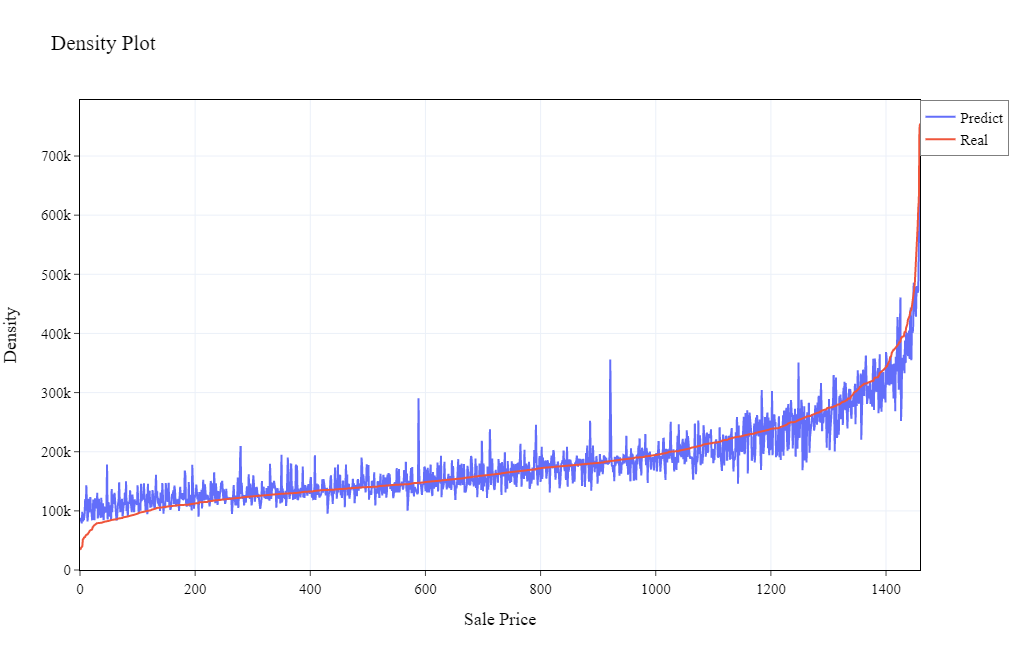

In [11]:
import plotly.graph_objects as go

title = 'Density Plot'
xaxis_title = 'Sale Price'
yaxis_title = 'Density'
font_size = 15
width = 900
height = 650

fig = go.Figure(layout={"template": "plotly_white"})

model_predict = regr.predict(train_X)

real_value = y


# 获取排序后的索引
sorted_indices = sorted(range(len(real_value)), key=lambda i: real_value[i])
# 使用索引重新排列list2
model_predict = [model_predict[i] for i in sorted_indices]
# 对list1也进行排序
real_value = sorted(real_value)

fig.add_trace(go.Scatter(x=[i for i in range(len(model_predict))],y=model_predict,name="Predict"))
fig.add_trace(go.Scatter(x=[i for i in range(len(real_value))],y=real_value,name="Real"))

# Add title
fig.update_yaxes(rangemode="tozero")
fig.update_layout(
    ######################## 图例设置 #############################
    title=title,
    width=width,
    height=height,
    legend=dict(x=1, y=1,  # 设置图例的位置，[0,1]之间
                font=dict(family='Times New Roman', size=15, color='black'),  # 设置图例的字体及颜色
                bordercolor="Black",
                borderwidth=0.5),
    xaxis=dict(mirror=True,
              ticks='outside',
              showline=True,
              showgrid=True,
              linewidth=1, linecolor='black',
              ),
    yaxis=dict(mirror=True,
              ticks='outside',
              showline=True,
              showgrid=True,
              tick0=0,
              linecolor='black'),
    xaxis_title=xaxis_title,  # X轴标题文本
    yaxis_title=yaxis_title,  # Y轴标题文本
    #     legend_title="Legend Title",      # 图例标题文本
    font=dict(
        family="Times New Roman",  # 所有标题文字的字体
        size=font_size,  # 所有标题文字的大小
        color="black"  # 所有标题的颜色
    ),
    xaxis_title_font_family='Times New Roman',  # 额外设置x轴标题的字体
    yaxis_title_font_color='black',  # 额外将y轴的字体设置为红色
)

fig.show()

In [12]:
linear_sample = pd.read_csv('./sample_submission.csv')
# 制作提交数据并保存
linear_sample['SalePrice'] = regr.predict(test_X)
linear_sample.to_csv('predict_result_RF.csv',index=False)

## 一些可视化

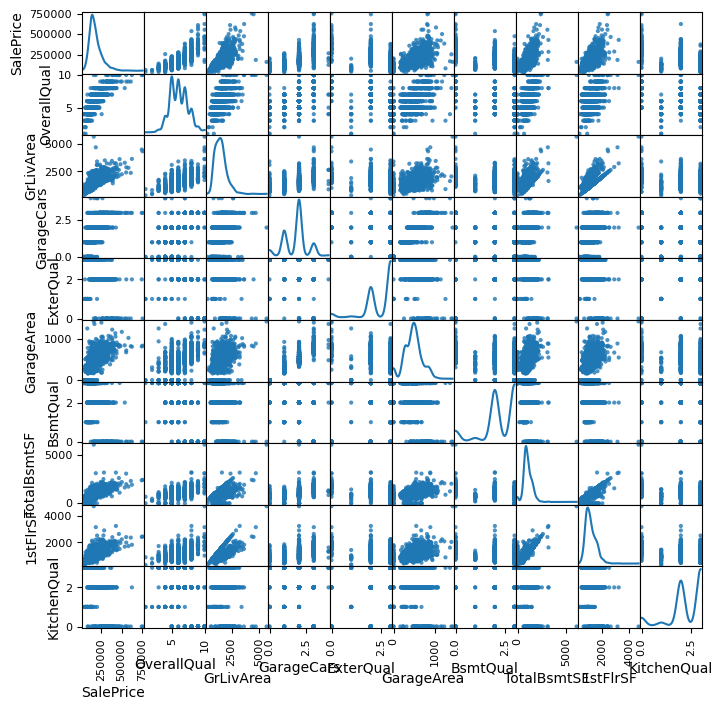

In [14]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(train_cleaned_encoded, alpha=0.8, figsize=(8, 8), diagonal='kde')
plt.show()

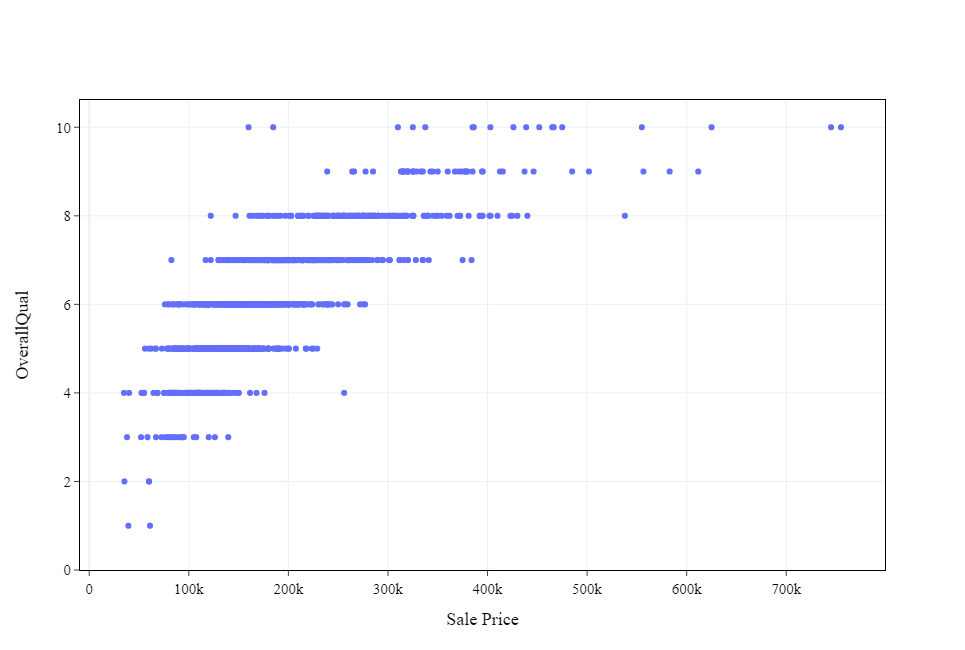

In [17]:
# 绘制数据点之间的关系
import plotly.graph_objects as go


title = ''
xaxis_title = 'Sale Price'
yaxis_title = 'OverallQual'
font_size = 15
width = 900
height = 650

fig = go.Figure(layout={"template": "plotly_white"})


fig.add_trace(go.Scatter(x=train_cleaned_encoded['SalePrice'],y=train_cleaned_encoded['OverallQual'],mode="markers"))


# Add title
fig.update_yaxes(rangemode="tozero")

fig.update_layout(
    ######################## 图例设置 #############################
    title=title,
    width=width,
    height=height,
    legend=dict(x=1, y=1,  # 设置图例的位置，[0,1]之间
                font=dict(family='Times New Roman', size=15, color='black'),  # 设置图例的字体及颜色
                bordercolor="Black",
                borderwidth=0.5),
    xaxis=dict(mirror=True,
              ticks='outside',
              showline=True,
              showgrid=True,
              linewidth=1, linecolor='black',
              ),
    yaxis=dict(mirror=True,
              ticks='outside',
              showline=True,
              showgrid=True,
              tick0=0,
              linecolor='black'),
    xaxis_title=xaxis_title,  # X轴标题文本
    yaxis_title=yaxis_title,  # Y轴标题文本
    #     legend_title="Legend Title",      # 图例标题文本
    font=dict(
        family="Times New Roman",  # 所有标题文字的字体
        size=font_size,  # 所有标题文字的大小
        color="black"  # 所有标题的颜色
    ),
    xaxis_title_font_family='Times New Roman',  # 额外设置x轴标题的字体
    yaxis_title_font_color='black',  # 额外将y轴的字体设置为红色
)


fig.show()


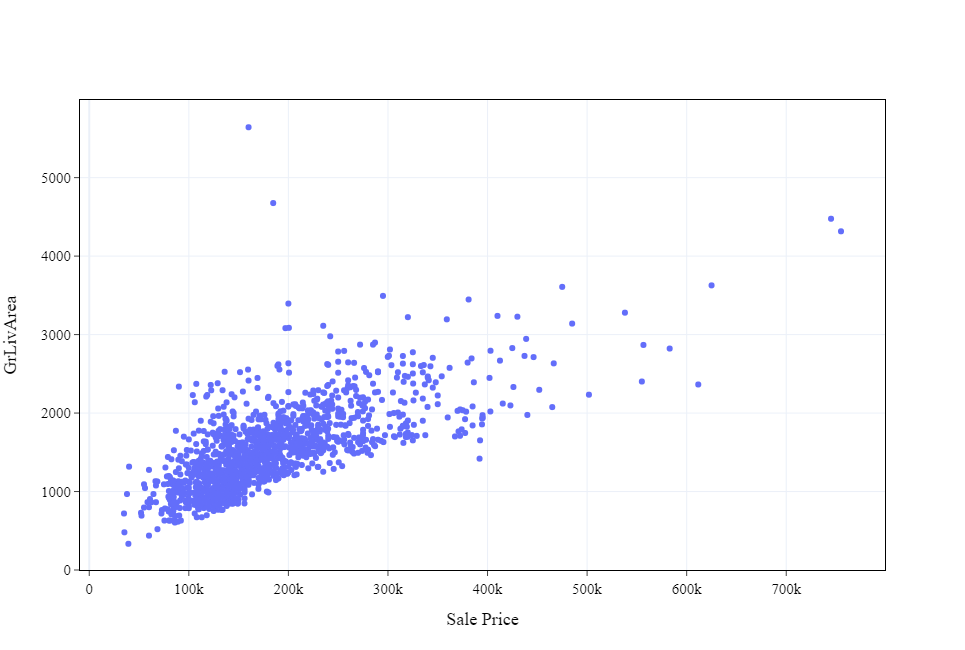

In [18]:
# 绘制数据点之间的关系
import plotly.graph_objects as go


title = ''
xaxis_title = 'Sale Price'
yaxis_title = 'GrLivArea'
font_size = 15
width = 900
height = 650

fig = go.Figure(layout={"template": "plotly_white"})


fig.add_trace(go.Scatter(x=train_cleaned_encoded['SalePrice'],y=train_cleaned_encoded['GrLivArea'],mode="markers"))


# Add title
fig.update_yaxes(rangemode="tozero")

fig.update_layout(
    ######################## 图例设置 #############################
    title=title,
    width=width,
    height=height,
    legend=dict(x=1, y=1,  # 设置图例的位置，[0,1]之间
                font=dict(family='Times New Roman', size=15, color='black'),  # 设置图例的字体及颜色
                bordercolor="Black",
                borderwidth=0.5),
    xaxis=dict(mirror=True,
              ticks='outside',
              showline=True,
              showgrid=True,
              linewidth=1, linecolor='black',
              ),
    yaxis=dict(mirror=True,
              ticks='outside',
              showline=True,
              showgrid=True,
              tick0=0,
              linecolor='black'),
    xaxis_title=xaxis_title,  # X轴标题文本
    yaxis_title=yaxis_title,  # Y轴标题文本
    #     legend_title="Legend Title",      # 图例标题文本
    font=dict(
        family="Times New Roman",  # 所有标题文字的字体
        size=font_size,  # 所有标题文字的大小
        color="black"  # 所有标题的颜色
    ),
    xaxis_title_font_family='Times New Roman',  # 额外设置x轴标题的字体
    yaxis_title_font_color='black',  # 额外将y轴的字体设置为红色
)


fig.show()


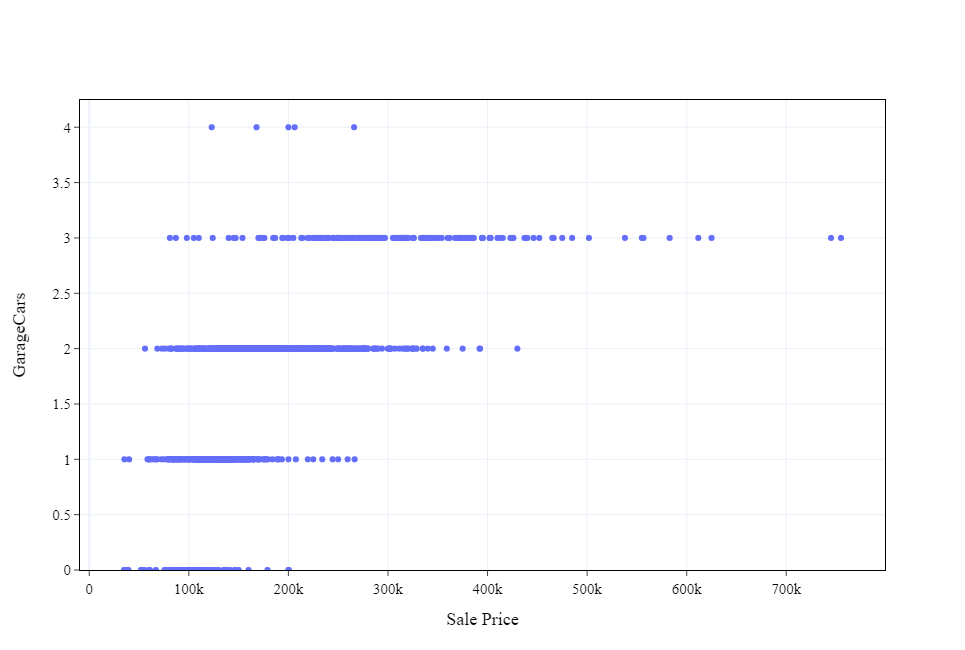

In [19]:
# 绘制数据点之间的关系
import plotly.graph_objects as go


title = ''
xaxis_title = 'Sale Price'
yaxis_title = 'GarageCars'
font_size = 15
width = 900
height = 650

fig = go.Figure(layout={"template": "plotly_white"})


fig.add_trace(go.Scatter(x=train_cleaned_encoded['SalePrice'],y=train_cleaned_encoded['GarageCars'],mode="markers"))


# Add title
fig.update_yaxes(rangemode="tozero")

fig.update_layout(
    ######################## 图例设置 #############################
    title=title,
    width=width,
    height=height,
    legend=dict(x=1, y=1,  # 设置图例的位置，[0,1]之间
                font=dict(family='Times New Roman', size=15, color='black'),  # 设置图例的字体及颜色
                bordercolor="Black",
                borderwidth=0.5),
    xaxis=dict(mirror=True,
              ticks='outside',
              showline=True,
              showgrid=True,
              linewidth=1, linecolor='black',
              ),
    yaxis=dict(mirror=True,
              ticks='outside',
              showline=True,
              showgrid=True,
              tick0=0,
              linecolor='black'),
    xaxis_title=xaxis_title,  # X轴标题文本
    yaxis_title=yaxis_title,  # Y轴标题文本
    #     legend_title="Legend Title",      # 图例标题文本
    font=dict(
        family="Times New Roman",  # 所有标题文字的字体
        size=font_size,  # 所有标题文字的大小
        color="black"  # 所有标题的颜色
    ),
    xaxis_title_font_family='Times New Roman',  # 额外设置x轴标题的字体
    yaxis_title_font_color='black',  # 额外将y轴的字体设置为红色
)


fig.show()


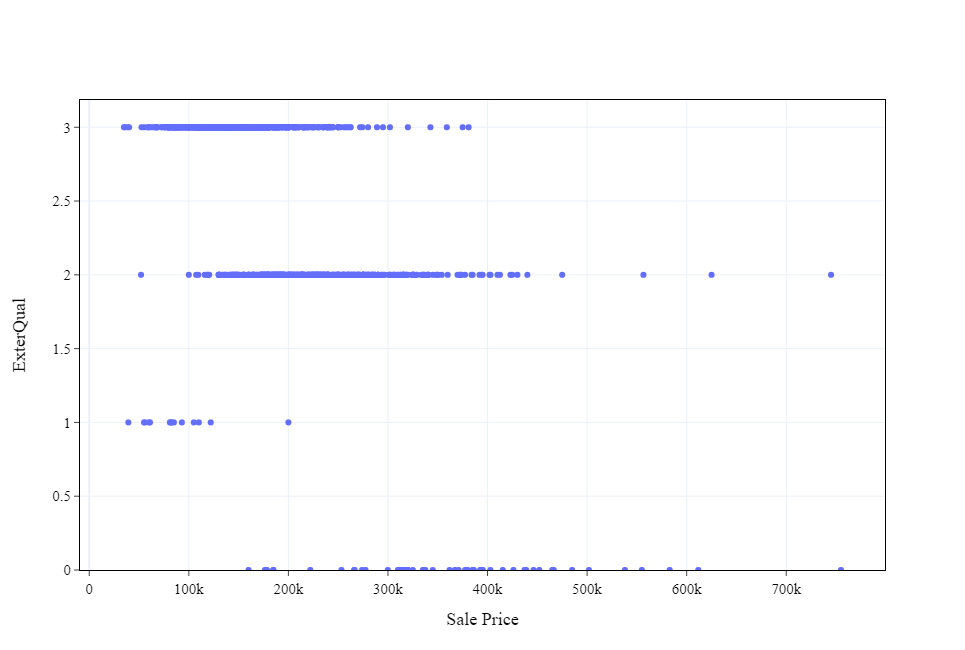

In [20]:
# 绘制数据点之间的关系
import plotly.graph_objects as go


title = ''
xaxis_title = 'Sale Price'
yaxis_title = 'ExterQual'
font_size = 15
width = 900
height = 650

fig = go.Figure(layout={"template": "plotly_white"})


fig.add_trace(go.Scatter(x=train_cleaned_encoded['SalePrice'],y=train_cleaned_encoded['ExterQual'],mode="markers"))


# Add title
fig.update_yaxes(rangemode="tozero")

fig.update_layout(
    ######################## 图例设置 #############################
    title=title,
    width=width,
    height=height,
    legend=dict(x=1, y=1,  # 设置图例的位置，[0,1]之间
                font=dict(family='Times New Roman', size=15, color='black'),  # 设置图例的字体及颜色
                bordercolor="Black",
                borderwidth=0.5),
    xaxis=dict(mirror=True,
              ticks='outside',
              showline=True,
              showgrid=True,
              linewidth=1, linecolor='black',
              ),
    yaxis=dict(mirror=True,
              ticks='outside',
              showline=True,
              showgrid=True,
              tick0=0,
              linecolor='black'),
    xaxis_title=xaxis_title,  # X轴标题文本
    yaxis_title=yaxis_title,  # Y轴标题文本
    #     legend_title="Legend Title",      # 图例标题文本
    font=dict(
        family="Times New Roman",  # 所有标题文字的字体
        size=font_size,  # 所有标题文字的大小
        color="black"  # 所有标题的颜色
    ),
    xaxis_title_font_family='Times New Roman',  # 额外设置x轴标题的字体
    yaxis_title_font_color='black',  # 额外将y轴的字体设置为红色
)


fig.show()